In [1]:
import pandas as pd

In [2]:
file_1 = '2016 School Explorer.csv'
file_2 = 'D5 SHSAT Registrations and Testers.csv'

In [3]:
df_1 = pd.read_csv(file_1)
df_2 = pd.read_csv(file_2)

In [4]:
pd.set_option('display.max_columns', None) 

In [5]:
df_num_nan = pd.DataFrame(df_1.count(), columns=['number of points'])
df_num_nan[df_num_nan['number of points'] < 1272]

,number of points
Adjusted Grade,2
New?,27
Other Location Code in LCGMS,1
Economic Need Index,1247
School Income Estimate,876
Student Attendance Rate,1247
Percent of Students Chronically Absent,1247
Rigorous Instruction %,1247
Rigorous Instruction Rating,1196
Collaborative Teachers %,1247


In [6]:
df_2['School name'].unique()

array(['P.S. 046 Arthur Tappan', 'P.S. 123 Mahalia Jackson',
       'P.S. 129 John H. Finley', 'Eagle Academy for Young Men of Harlem',
       'The Urban Assembly School for Global Commerce',
       'P.S. 161 Pedro Albizu Campos',
       'I.S. M286 Renaissance Leadership Academy',
       'Urban Assembly Academy for Future Leaders', 'KAPPA IV',
       'Mott Hall High School', 'Columbia Secondary School',
       'Academy for Social Action: A College Board School',
       'Academy for Social Action',
       'Urban Assembly School for the Performing Arts',
       'The Urban Assembly Institute for New Technologies',
       'Choir Academy of Harlem', 'Frederick Douglass Academy',
       'New Design Middle School',
       'Thurgood Marshall Academy for Learning and Social Change',
       'High School for Mathematics, Science and Engineering at City College',
       'Democracy Prep Endurance Charter School',
       "Harlem Children's Zone Promise Academy 1 Charter School",
       'KIPP Infinit

In [7]:
#Strip out percent signs from columns.

def remove_percent(d):
    return float(d.strip('%'))/100

In [8]:
df_1[['Percent ELL',
    'Percent Asian',
    'Percent Black',
    'Percent Hispanic',
    'Percent Black / Hispanic',
    'Percent White',
    'Percent of Students Chronically Absent',
    'Rigorous Instruction %',
    'Collaborative Teachers %',
    'Supportive Environment %',
    'Effective School Leadership %',
    'Strong Family-Community Ties %',
    'Trust %', 
    'Student Attendance Rate']] = df_1[['Percent ELL',
                    'Percent Asian',
                    'Percent Black',
                    'Percent Hispanic',
                    'Percent Black / Hispanic',
                    'Percent White',
                    'Percent of Students Chronically Absent',
                    'Rigorous Instruction %',
                    'Collaborative Teachers %',
                    'Supportive Environment %',
                    'Effective School Leadership %',
                    'Strong Family-Community Ties %',
                    'Trust %',
                    'Student Attendance Rate']].astype(str).applymap(remove_percent)

In [9]:
df_1['School Income Estimate'] = df_1['School Income Estimate'].replace('[\$,)]','', regex=True ).astype(float)

In [10]:
#https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

df_1.loc[df_1['School Income Estimate'].isnull(), 
         "School Income Estimate"] = df_1.groupby('City')['School Income Estimate'].transform('mean')

In [11]:
df_num_nan = pd.DataFrame(df_1.count(), columns=['number of points'])
df_num_nan[df_num_nan['number of points'] < 1272]

,number of points
Adjusted Grade,2
New?,27
Other Location Code in LCGMS,1
Economic Need Index,1247
Student Attendance Rate,1247
Percent of Students Chronically Absent,1247
Rigorous Instruction %,1247
Rigorous Instruction Rating,1196
Collaborative Teachers %,1247
Collaborative Teachers Rating,1196


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [13]:
#Count the number of NaN in each column.
df_num_nan = pd.DataFrame(df_1.count(), columns=['number of points'])

#Shows columns that have missing data. 
df_num_nan[df_num_nan['number of points'] < 1272]

,number of points
Adjusted Grade,2
New?,27
Other Location Code in LCGMS,1
Economic Need Index,1247
Student Attendance Rate,1247
Percent of Students Chronically Absent,1247
Rigorous Instruction %,1247
Rigorous Instruction Rating,1196
Collaborative Teachers %,1247
Collaborative Teachers Rating,1196


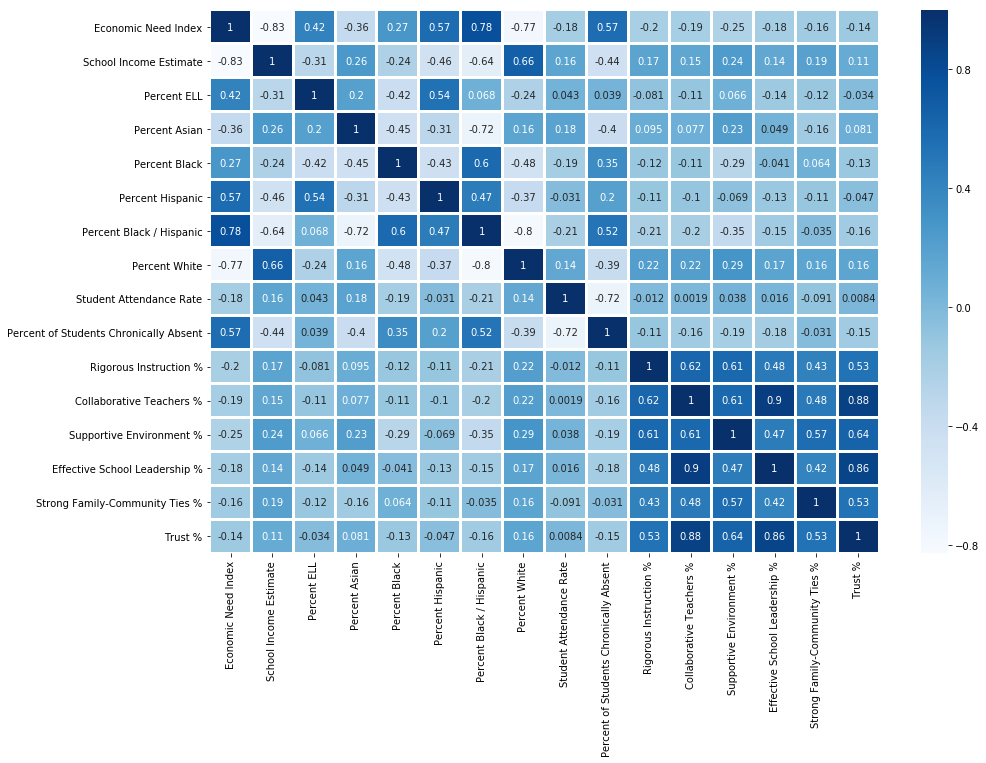

In [14]:
df_corr = df_1.iloc[:,[16,17,18,19,20,21,22,23,24,25,26,28,30,32,34,36]]
corr = df_corr.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="Blues",
            linewidths=2,
            annot=True)

In [27]:
df_eco_need_ct = df_1[['Economic Need Index', 
                    'City']].groupby('City', as_index=False).count().sort_values(by='Economic Need Index',
                                                                ascending=False).reset_index()
df_eco_need = df_1[['Economic Need Index', 
                    'City']].groupby('City', as_index=False).median().sort_values(by='Economic Need Index',
                                                                ascending=False).reset_index()

In [29]:
df_eco_need_ct

,index,City,Economic Need Index
0,6,BROOKLYN,411
1,5,BRONX,297
2,27,NEW YORK,232
3,41,STATEN ISLAND,60
4,21,JAMAICA,32
5,15,FLUSHING,30
6,24,LONG ISLAND CITY,21
7,2,BAYSIDE,13
8,13,FAR ROCKAWAY,13
9,40,SPRINGFIELD GARDENS,11


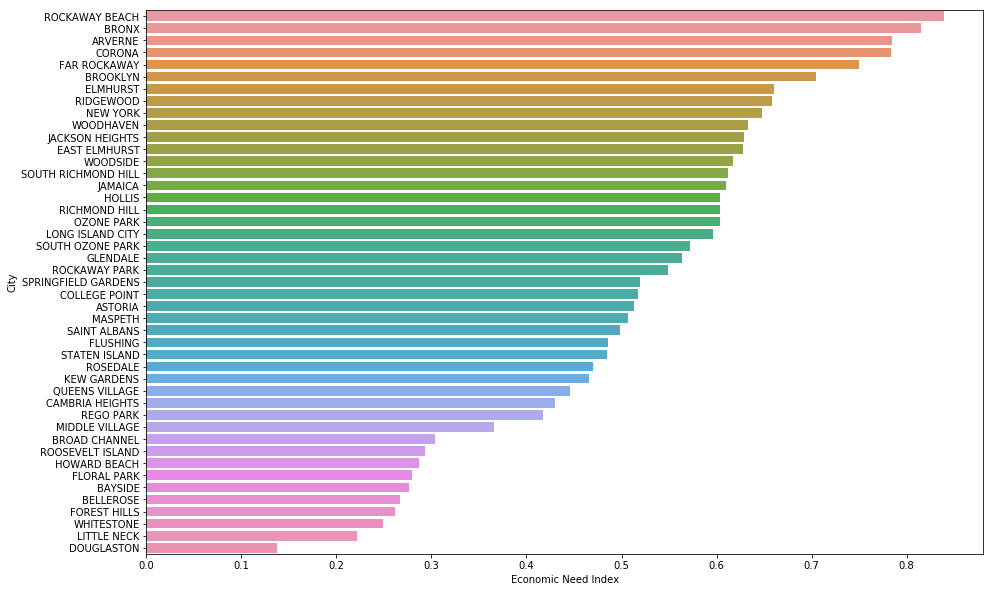

In [17]:
plt.subplots(figsize=(15,10))
sns.barplot(y="City", x="Economic Need Index", data=df_eco_need)

In [18]:
df_1["Economic Need Index"] = df_1["Economic Need Index"].fillna(df_1["Economic Need Index"].mean())

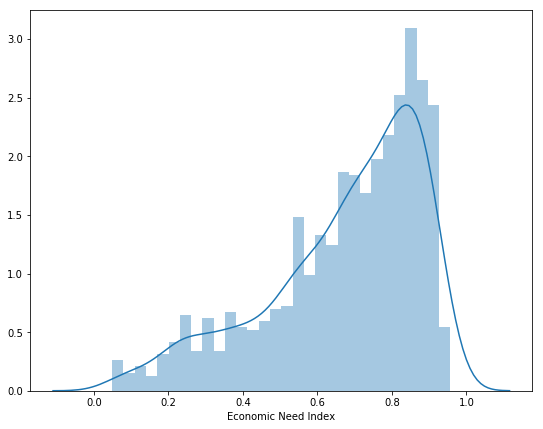

In [19]:
plt.subplots(figsize=(9,7))
sns.distplot(df_1["Economic Need Index"], bins=30)

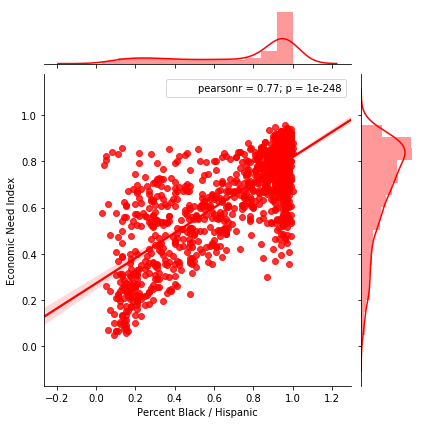

In [20]:
sns.jointplot("Percent Black / Hispanic", "Economic Need Index", df_1,kind='reg',color="red") 

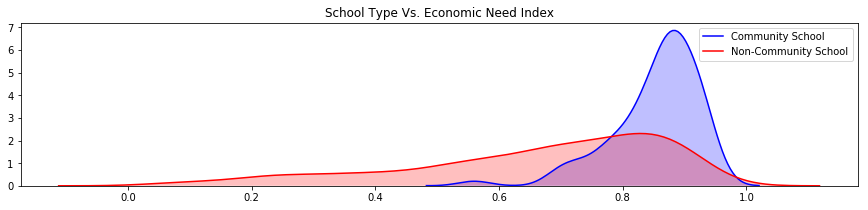

In [21]:
fig = plt.figure(figsize=(15,3))

ax=sns.kdeplot(df_1.loc[(df_1['Community School?'] == 'Yes'),
                        'Economic Need Index'],
               color='b', 
               shade=True, 
               label='Community School')

ax=sns.kdeplot(df_1.loc[(df_1['Community School?'] == 'No'),
                        'Economic Need Index'], 
               color='r', 
               shade=True, 
               label='Non-Community School')

plt.title('School Type Vs. Economic Need Index')
plt.show()

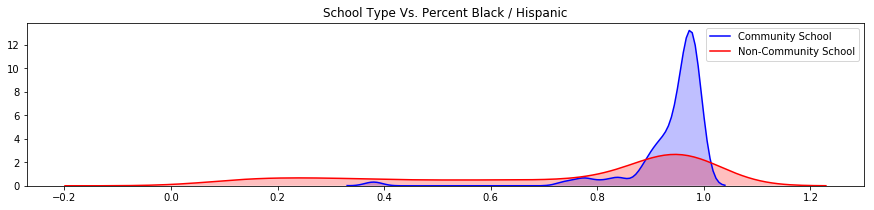

In [22]:
fig = plt.figure(figsize=(15,3))

ax=sns.kdeplot(df_1.loc[(df_1['Community School?'] == 'Yes'),
                        'Percent Black / Hispanic'],
               color='b', 
               shade=True, 
               label='Community School')

ax=sns.kdeplot(df_1.loc[(df_1['Community School?'] == 'No'),
                        'Percent Black / Hispanic'], 
               color='r', 
               shade=True, 
               label='Non-Community School')

plt.title('School Type Vs. Percent Black / Hispanic')
plt.show()